# Model Evaluation

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week 03 - Machine Learning Algorithms/2_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->




## Classifier Evaluation

### True Positive (TP) 

The predicted value matches the actual value
The actual value was positive and the model predicted a positive value

### True Negative (TN) 

The predicted value matches the actual value
The actual value was negative and the model predicted a negative value

### False Positive (FP) – Type 1 error

The predicted value was falsely predicted
The actual value was negative but the model predicted a positive value
Also known as the Type 1 error

### False Negative (FN) – Type 2 error

The predicted value was falsely predicted
The actual value was positive but the model predicted a negative value
Also known as the Type 2 error

### Precision
Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

$$Precision = \dfrac{TP}{TP + FP}$$

### Recall
Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.
in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

$$Recall = \dfrac{TP}{TP + FN}$$

### F1 score
F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

$$F1 = 2 \cdot \dfrac{Precision \cdot Recall}{Precision + Recall}$$

### Confusion Matrix
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [6]:
from sklearn import linear_model, metrics, datasets, model_selection, pipeline, preprocessing

In [7]:
x, y = datasets.load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

In [8]:
# Create the pipeline from the scaler and the estimator 
# Scaler 
scaler = preprocessing.StandardScaler()
# Estimator 
estimator = linear_model.LogisticRegression(solver="liblinear", random_state=42)
# Create the pipeline 
pipe = pipeline.Pipeline([('scaler',scaler),
                          ('estimator',estimator)]
                             
                             )

In [9]:
# fit the pipeline of the x_train and y_train
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 LogisticRegression(random_state=42, solver='liblinear'))])

Accuracy Score: 0.9649122807017544
True Positive: 35
True Negative: 20
False Positive: 1
False Negative: 1
Precision Score: 0.9722222222222222
Precision Score Manual: 0.9722222222222222
Recall Score: 0.9722222222222222
Recall Score Manual: 0.9722222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


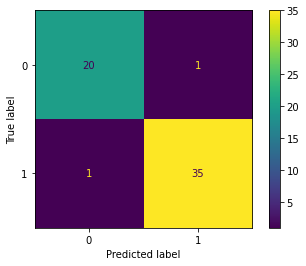

In [10]:
y_pred = pipe.predict(x_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
tp, tn, fp, fn = cf_matrix[1, 1], cf_matrix[0, 0], cf_matrix[0, 1], cf_matrix[1, 0]
print("True Positive:", tp)
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)

precision1 = metrics.precision_score(y_test, y_pred)
precision2 = tp / (tp + fp)

print("Precision Score:", precision1)
print("Precision Score Manual:", precision2)

recall1 = metrics.recall_score(y_test, y_pred)
recall2 = tp / (tp + fn)
print("Recall Score:", recall1)
print("Recall Score Manual:", recall2)


metrics.plot_confusion_matrix(pipe, x_test, y_test)

## Regression Metrics

### Mean Squared Error

MSE is the average of the squared error that is used as the loss function for least squares regression: It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.

$$mse = 1/m \sum_{i=0}^{m} (\hat{y_i} - y_i)^2$$

Where m is the total number of examples being tested, and $\hat{y}$ is the predicted label while $y$ is the actual label

### Mean Absolute Error

MAE is the average of the absolue errors that is used as the loss function for  regression: It is the sum, over all the data points, of the absolute of the difference between the predicted and actual target variables, divided by the number of data points.

$$mae = 1/m \sum_{i=0}^{m} |\hat{y_i} - y_i|$$

Where m is the total number of examples being tested, and $\hat{y}$ is the predicted label while $y$ is the actual label


### $R^2$ score
the $R^2$ score varies between 0 and 100%. It is closely related to the MSE .

if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.


In [12]:
x, y = datasets.load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.1, random_state=42
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [16]:
# Create the pipeline from the scaler and the estimator 
# Scaler 
scaler = preprocessing.MinMaxScaler()
# Estimator 
estimator = linear_model.LinearRegression()
# Create the pipeline 
pipe = pipeline.Pipeline([('scaler',scaler),
                          ('estimator',estimator)]
                             
                             )

In [17]:
# fit the pipeline onf the x_train and y_train
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', LinearRegression())])

In [18]:
y_pred = pipe.predict(x_test)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 14.995852876582648
Mean Absolute Error: 2.8342104578589598
R2 Score: 0.7598135533532474
